In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df_16 = pd.read_csv("../data/county_2016_preprocessed1.csv")

# encode dem/gop wins
df_16 = df_16.dropna()
df_16['DEM'] = df_16['DEM'].astype('int32')
df_16['GOP'] = df_16['GOP'].astype('int32')

df_16['DEMWin']=0
for idx, row in df_16.iterrows():
    if row['DEM'] >= row['GOP']:
        df_16['DEMWin'][idx]=1

df_16['MedianIncome'] = df_16['MedianIncome'].replace(',','', regex=True)
df_16['MedianIncome'] = df_16['MedianIncome'].astype('int32')

df_16.head()

<ipython-input-2-5c086fed09d9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_16['DEMWin'][idx]=1


,FIPS,County,DEM,GOP,MedianIncome,MigraRate,BirthRate,DeathRate,BachelorRate,UnemploymentRate,State,zip,primary_city,latitude,longitude,estimated_population,DEMWin
0,1001,Autauga,5908,18110,54487,5.3,12.2,10.0,27.7,5.1,AL,36003.0,Autaugaville,32.43,-86.65,1628.0,0
1,1003,Baldwin,18409,72780,56460,21.5,11.2,9.8,31.3,5.3,AL,31034.0,Hardwick,32.99,-83.29,1741.0,0
2,1005,Barbour,4848,5431,32884,-18.2,10.6,10.8,12.2,8.3,AL,26238.0,Volga,39.06,-80.11,698.0,0
3,1007,Bibb,1874,6733,43079,-0.8,12.1,10.8,11.5,6.4,AL,31052.0,Lizella,32.76,-83.86,7592.0,0
4,1009,Blount,2150,22808,47213,-1.0,12.2,11.2,12.6,5.4,AL,35013.0,Allgood,33.90,-86.51,0.0,0


In [3]:
df_12 = pd.read_csv("../data/county_2012_preprocessed1.csv")

# encode dem/gop wins
df_12 = df_12.dropna()
df_12['DEM'] = df_12['DEM'].astype('int32')
df_12['GOP'] = df_12['GOP'].astype('int32')

df_12['DEMWin']=0
for idx, row in df_12.iterrows():
    if row['DEM'] >= row['GOP']:
        df_12['DEMWin'][idx]=1

df_12['MedianIncome'] = df_12['MedianIncome'].replace(',','', regex=True)
df_12['MedianIncome'] = df_12['MedianIncome'].astype('int32')

df_12.head()

<ipython-input-3-ed23f149f7f6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_12['DEMWin'][idx]=1


,FIPS,County,DEM,GOP,MedianIncome,MigraRate,BirthRate,DeathRate,BachelorRate,UnemploymentRate,State,zip,primary_city,latitude,longitude,estimated_population,DEMWin
0,1001,Autauga,6354,17366,51441,-6.1,11.1,10.2,21.9,6.9,AL,36003.0,Autaugaville,32.43,-86.65,1628.0,0
1,1003,Baldwin,18329,65772,48867,17.6,11.1,10.0,28.6,7.5,AL,31034.0,Hardwick,32.99,-83.29,1741.0,0
2,1005,Barbour,5873,5539,30287,-6.8,11.0,10.7,13.6,11.5,AL,26238.0,Volga,39.06,-80.11,698.0,1
3,1007,Bibb,2200,6131,37392,-3.8,10.8,10.5,10.2,8.5,AL,31052.0,Lizella,32.76,-83.86,7592.0,0
4,1009,Blount,2961,20741,44225,-1.6,12.4,10.3,12.3,6.9,AL,35013.0,Allgood,33.90,-86.51,0.0,0


In [4]:
y_12 = df_12[['DEMWin']]
df_change = df_16.loc[:,"MedianIncome":"UnemploymentRate"] - df_12.loc[:,"MedianIncome":"UnemploymentRate"]
df_change = df_change.rename(columns={"MedianIncome": "MedianIncomeChange", "MigraRate": "MigraRateChange", "BirthRate": "BirthRateChange", "DeathRate": "DeathRateChange", "BachelorRate": "BachelorRateChange", "UnemploymentRate": "UnemploymentRateChange"})
df_new = pd.concat([df_16.loc[:,"MedianIncome":"UnemploymentRate"], df_change, y_12], axis=1)
df_new = df_new.rename(columns={"DEMWin": "DEMWin12"})
df_new

,MedianIncome,MigraRate,BirthRate,DeathRate,BachelorRate,UnemploymentRate,MedianIncomeChange,MigraRateChange,BirthRateChange,DeathRateChange,BachelorRateChange,UnemploymentRateChange,DEMWin12
0,54487,5.3,12.2,10.0,27.7,5.1,3046,11.4,1.1,-0.2,5.8,-1.8,0
1,56460,21.5,11.2,9.8,31.3,5.3,7593,3.9,0.1,-0.2,2.7,-2.2,0
2,32884,-18.2,10.6,10.8,12.2,8.3,2597,-11.4,-0.4,0.1,-1.4,-3.2,1
3,43079,-0.8,12.1,10.8,11.5,6.4,5687,3.0,1.3,0.3,1.3,-2.1,0
4,47213,-1.0,12.2,11.2,12.6,5.4,2988,0.6,-0.2,0.9,0.3,-1.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,74546,-17.9,14.0,6.8,22.0,6.1,9799,-33.2,0.6,0.7,3.9,1.3,0
3139,84118,-0.5,11.0,4.2,57.4,3.5,17526,-2.5,0.3,1.4,5.5,-3.2,1
3140,64713,-11.3,14.3,6.9,15.4,5.8,3656,-6.8,-0.5,1.4,-3.3,0.2,0
3141,49533,-15.2,10.8,9.4,21.5,4.8,0,-12.2,0.1,-3.1,0.3,-0.4,0


We set up x and edge indices:

In [5]:
# normalize columns
for i, c in enumerate(df_new.columns): 
    df_new[c] = (df_new[c]-df_new[c].mean()) / df_new[c].std()

df_new

,MedianIncome,MigraRate,BirthRate,DeathRate,BachelorRate,UnemploymentRate,MedianIncomeChange,MigraRateChange,BirthRateChange,DeathRateChange,BachelorRateChange,UnemploymentRateChange,DEMWin12
0,0.402334,0.401981,0.239021,-0.293702,0.675324,-0.056617,-0.516812,0.576326,0.748550,-0.542400,2.067022,0.466768,-0.519314
1,0.557411,1.631638,-0.167636,-0.365196,1.063329,0.052022,0.919488,0.127665,0.048885,-0.542400,0.589540,0.242528,-0.519314
2,-1.295646,-1.381779,-0.411630,-0.007724,-0.995255,1.681600,-0.658641,-0.787604,-0.300948,-0.353436,-1.364550,-0.318071,1.924987
3,-0.494326,-0.061037,0.198355,-0.007724,-1.070700,0.649534,0.317423,0.073826,0.888483,-0.227459,-0.077710,0.298588,-0.519314
4,-0.169397,-0.076218,0.239021,0.135265,-0.952143,0.106341,-0.535133,-0.069746,-0.161015,0.150469,-0.554318,0.634948,-0.519314
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,1.978957,-1.359008,0.971003,-1.437615,0.060982,0.486576,1.616316,-2.091713,0.398718,0.024493,1.161468,2.204628,-0.519314
3139,2.731310,-0.038266,-0.248967,-2.367044,3.876367,-0.925725,4.057109,-0.255193,0.188818,0.465410,1.924040,-0.318071,1.924987
3140,1.206091,-0.858037,1.092999,-1.401867,-0.650361,0.323618,-0.324126,-0.512425,-0.370914,0.465410,-2.270104,1.587968,-0.519314
3141,0.012954,-1.154065,-0.330298,-0.508186,0.007092,-0.219574,-1.478978,-0.835461,0.048885,-2.369056,-0.554318,1.251608,-0.519314


In [6]:
x = np.array(df_new)

In [7]:
graph_df = pd.read_csv("../data/county_graph_preprocessed.csv")
graph_df.head()

,SRC,DST
0,1001,1001
1,1001,1021
2,1001,1047
3,1001,1051
4,1001,1085


In [8]:
all_fips = df_16['FIPS']
all_fips = set(all_fips.tolist())

# encode fips to index
fips_node_idx = {}
i = 0
for f in graph_df['SRC'].tolist():
    if (f not in fips_node_idx) and (f in all_fips):
        fips_node_idx[f] = i
        i += 1

In [9]:
assert len(fips_node_idx) == len(all_fips)

In [10]:
src = graph_df['SRC'].tolist()
dst = graph_df['DST'].tolist()

final_src = []
final_dst = []
for s, d in zip(src, dst):
    if s in all_fips and d in all_fips:
        final_src.append(fips_node_idx[s])
        final_dst.append(fips_node_idx[d])
    
src_lst = final_src + final_dst
dst_lst = final_dst + final_src

Set up train, validation, and test splits:

In [11]:
trainval_idx = np.random.choice(len(df_new), int(len(df_new) * 0.7), replace=False)

test_mask = np.ones(len(df_new), dtype=bool)
test_mask[trainval_idx] = 0

num_train = int(0.3 * len(trainval_idx))
train_idx = trainval_idx[num_train:]
val_idx = trainval_idx[:num_train]

train_mask = np.zeros(len(df_new), dtype=bool)
val_mask = np.zeros(len(df_new), dtype=bool)
train_mask[train_idx] = 1
val_mask[val_idx] = 1

In [12]:
np.sum(train_mask), np.sum(val_mask)

(1495, 640)

In [13]:
y = df_16['DEMWin'].tolist()
train_y = np.compress(train_mask, y)
val_y = np.compress(val_mask, y)
test_y = np.compress(test_mask, y)

In [14]:
np.sum(train_mask + val_mask + test_mask)

3050

In [15]:
def weighted_accuracy(pred, true):
    assert(len(pred) == len(true))
    num_labels = len(true)
    num_pos = sum(true)
    num_neg = num_labels - num_pos
    frac_pos = num_pos/num_labels
    weight_pos = 1/frac_pos
    weight_neg = 1/(1-frac_pos)
    num_pos_correct = 0
    num_neg_correct = 0
    for pred_i, true_i in zip(pred, true):
        num_pos_correct += (pred_i == true_i and true_i == 1)
        num_neg_correct += (pred_i == true_i and true_i == 0)
    weighted_accuracy = ((weight_pos * num_pos_correct) 
                         + (weight_neg * num_neg_correct))/((weight_pos * num_pos) + (weight_neg * num_neg))
    return weighted_accuracy

In [16]:
import torch
from torch_geometric.data import Data

x = torch.tensor(x, dtype=torch.float)
edge_index = torch.tensor([src_lst,
                           dst_lst], dtype=torch.long)

data_loader = Data(x=x, edge_index=edge_index, y_train=torch.from_numpy(train_y).long(), y_val=torch.from_numpy(val_y).long(), y_test=torch.from_numpy(test_y).long(), train_mask=train_mask, val_mask=val_mask, test_mask=test_mask, num_classes=2)

In [17]:
import torch.nn.functional as F
import torch_geometric.transforms as T
from torch_geometric.nn import GCNConv, ChebConv

class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.h_layers = 6

        self.conv1 = ChebConv(data_loader.num_node_features, self.h_layers, K=2)
        self.conv2 = ChebConv(self.h_layers, data_loader.num_classes, K=2)

#         self.conv1 = GCNConv(data_loader.num_node_features, 16, cached=True, normalize=True)
#         self.conv2 = GCNConv(16, data_loader.num_classes, cached=True, normalize=True)

    def forward(self, data):
#         import pdb; pdb.set_trace()
        x, edge_index, edge_weight = data.x, data.edge_index, data.edge_attr
        x = F.relu(self.conv1(x, edge_index, edge_weight))
        x = F.dropout(x, training=self.training)
        x = F.relu(self.conv2(x, edge_index, edge_weight))
        return F.log_softmax(x, dim=1)

In [18]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model, data_loader = Net().to(device), data_loader.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

In [19]:
pos_w = np.sum(train_y) / len(train_y)
neg_w = 1 - pos_w

pos_w, neg_w

(0.14448160535117058, 0.8555183946488294)

In [20]:
def train():
    model.train()
    optimizer.zero_grad()
    F.nll_loss(model(data_loader)[data_loader.train_mask], data_loader.y_train, weight=torch.as_tensor([pos_w, neg_w], dtype=torch.float)).backward()
#     print(weighted_accuracy(model(data_loader)[data_loader.train_mask].max(1)[1].detach().numpy(), data_loader.y_train.detach().numpy()))
    optimizer.step()

@torch.no_grad()
def test():
    model.eval()
    logits, accs = model(data_loader), []
    
    pred = logits[data_loader.train_mask].max(1)[1]
#     acc = pred.eq(data_loader.y_train).sum().item() / data_loader.train_mask.sum().item()
    acc = weighted_accuracy(pred.detach().numpy(), data_loader.y_train)
    accs.append(acc)
    
    pred = logits[data_loader.val_mask].max(1)[1]
#     acc = pred.eq(data_loader.y_val).sum().item() / data_loader.val_mask.sum().item()
    acc = weighted_accuracy(pred.detach().numpy(), data_loader.y_val)
    accs.append(acc)
    
    return accs

In [21]:
# train val
for epoch in range(1, 501):
    train()
    train_acc, val_acc = test()
    log = 'Epoch: {:03d}, Train: {:.4f}, Val: {:.4f}'
    if epoch % 10 == 0:
        print(log.format(epoch, train_acc, val_acc))

Epoch: 010, Train: 0.6654, Val: 0.6705
Epoch: 020, Train: 0.7404, Val: 0.7638
Epoch: 030, Train: 0.8025, Val: 0.8018
Epoch: 040, Train: 0.8364, Val: 0.8550
Epoch: 050, Train: 0.9011, Val: 0.8785
Epoch: 060, Train: 0.9320, Val: 0.9210
Epoch: 070, Train: 0.9366, Val: 0.9353
Epoch: 080, Train: 0.9424, Val: 0.9291
Epoch: 090, Train: 0.9532, Val: 0.9328
Epoch: 100, Train: 0.9571, Val: 0.9264
Epoch: 110, Train: 0.9544, Val: 0.9309
Epoch: 120, Train: 0.9559, Val: 0.9284
Epoch: 130, Train: 0.9590, Val: 0.9309
Epoch: 140, Train: 0.9629, Val: 0.9219
Epoch: 150, Train: 0.9544, Val: 0.9238
Epoch: 160, Train: 0.9571, Val: 0.9247
Epoch: 170, Train: 0.9621, Val: 0.9219
Epoch: 180, Train: 0.9559, Val: 0.9256
Epoch: 190, Train: 0.9656, Val: 0.9229
Epoch: 200, Train: 0.9567, Val: 0.9256
Epoch: 210, Train: 0.9598, Val: 0.9265
Epoch: 220, Train: 0.9660, Val: 0.9274
Epoch: 230, Train: 0.9656, Val: 0.9256
Epoch: 240, Train: 0.9656, Val: 0.9284
Epoch: 250, Train: 0.9641, Val: 0.9274
Epoch: 260, Train: 0.9645

Test accuracy:

In [22]:
logits = model(data_loader)
pred = logits[data_loader.test_mask].max(1)[1]
test_acc = pred.eq(data_loader.y_test).sum().item() / data_loader.test_mask.sum().item()
print("Test accuracy: " + str(test_acc))
test_acc = weighted_accuracy(pred.detach().numpy(), data_loader.y_test.detach().numpy())
print("Weighted test accuracy: " + str(test_acc))

Test accuracy: 0.9300546448087431
Weighted test accuracy: 0.9300608717707165


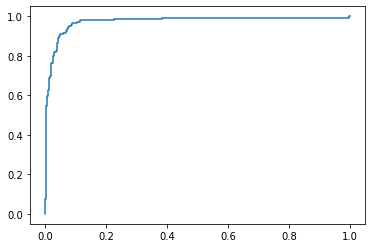

In [23]:
from sklearn.metrics import roc_curve, auc

%matplotlib inline
import matplotlib.pyplot as plt

pred_probs = logits[data_loader.test_mask]
fpr, tpr, thresholds = roc_curve(data_loader.y_test.detach().numpy(), pred_probs[:,1].detach().numpy())

plt.plot(fpr, tpr)
plt.show()

In [24]:
auc(fpr, tpr)

0.9740298561542085

#### for Chris:

In [25]:
trainval_idx = np.random.choice(len(df_new), int(len(df_new) * 0.5), replace=False)

test_mask = np.ones(len(df_new), dtype=bool)
test_mask[trainval_idx] = 0

train_mask = np.zeros(len(df_new), dtype=bool)
train_mask[trainval_idx] = 1

In [27]:
y = df_16['DEMWin'].tolist()
train_y = np.compress(train_mask, y)
test_y = np.compress(test_mask, y)

In [28]:
data_loader = Data(x=x, edge_index=edge_index, y_train=torch.from_numpy(train_y).long(), y_val=torch.from_numpy(val_y).long(), y_test=torch.from_numpy(test_y).long(), train_mask=train_mask, test_mask=test_mask, num_classes=2)

In [29]:
def train():
    model.train()
    optimizer.zero_grad()
    F.nll_loss(model(data_loader)[data_loader.train_mask], data_loader.y_train, weight=torch.as_tensor([pos_w, neg_w], dtype=torch.float)).backward()
    optimizer.step()

@torch.no_grad()
def test():
    model.eval()
    logits, accs = model(data_loader), []
    
    pred = logits[data_loader.train_mask].max(1)[1]
    acc = weighted_accuracy(pred.detach().numpy(), data_loader.y_train)
    accs.append(acc)
    
#     pred = logits[data_loader.test_mask].max(1)[1]
#     acc = weighted_accuracy(pred.detach().numpy(), data_loader.y_test)
#     accs.append(acc)
    
    return accs

In [34]:
# train val
for epoch in range(1, 101):
    train()
    train_acc = test()
    log = 'Epoch: {:03d}, Train: {:.4f}'
    if epoch % 10 == 0:
        print(log.format(epoch, train_acc[0]))

Epoch: 010, Train: 0.9699
Epoch: 020, Train: 0.9699
Epoch: 030, Train: 0.9707
Epoch: 040, Train: 0.9735
Epoch: 050, Train: 0.9762
Epoch: 060, Train: 0.9762
Epoch: 070, Train: 0.9770
Epoch: 080, Train: 0.9766
Epoch: 090, Train: 0.9770
Epoch: 100, Train: 0.9770


In [37]:
logits = model(data_loader)
pred_1 = logits[data_loader.test_mask].max(1)[1]

In [38]:
def train():
    model.train()
    optimizer.zero_grad()
    F.nll_loss(model(data_loader)[data_loader.test_mask], data_loader.y_test, weight=torch.as_tensor([pos_w, neg_w], dtype=torch.float)).backward()
    optimizer.step()

@torch.no_grad()
def test():
    model.eval()
    logits, accs = model(data_loader), []
    
    pred = logits[data_loader.test_mask].max(1)[1]
    acc = weighted_accuracy(pred.detach().numpy(), data_loader.y_test)
    accs.append(acc)
    
    return accs

In [39]:
# train val
for epoch in range(1, 101):
    train()
    train_acc = test()
    log = 'Epoch: {:03d}, Train: {:.4f}'
    if epoch % 10 == 0:
        print(log.format(epoch, train_acc[0]))

Epoch: 010, Train: 0.9204
Epoch: 020, Train: 0.9440
Epoch: 030, Train: 0.9471
Epoch: 040, Train: 0.9518
Epoch: 050, Train: 0.9521
Epoch: 060, Train: 0.9543
Epoch: 070, Train: 0.9584
Epoch: 080, Train: 0.9587
Epoch: 090, Train: 0.9591
Epoch: 100, Train: 0.9606


In [40]:
logits = model(data_loader)
pred_2 = logits[data_loader.train_mask].max(1)[1]

In [46]:
results = np.zeros(len(df_new), dtype=bool)
results = np.putmask(results, data_loader.test_mask, pred_1)
print(results)

None


array([False, False, False, ..., False, False, False])